# Numerical Tools
Covers: Numpy & Pandas 

## Numpy

#### Creating Numpy Arrays

In [5]:
import numpy as np

# Create special Numpy array (more efficient & faster)
arr = np.array([1, 2, 3, 4, 5])  # type) numpy.ndarray
arr = np.array((1, 2, 3, 4, 5))  # Can also convert tuples and other array-like objects

# 2-D Arrays
arr2d = np.array([[1, 2, 3], [4, 5, 6]])
# 3-d Arrays, and so on
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]]])

# Using the 'ndim' attribute, which returns dimensions of array
print(arr3d.ndim)

3


#### Accessing Numpy Arrays

In [ ]:
# Refer using index number
x = arr[0]
x2 = arr2d[0, 1]  # Accessing 2-d array

# Iterating through arrays
for num in arr:
    print(num)
# 2-D Arrays
for row in arr2d:
    for col in arr2d:
        print(col)
for j in arr2d:
    print(j)  # Prints entire row

#### Sorting Numpy Arrays

In [ ]:
print(np.sort(arr))  # Does not permanently sort it

#### Calculation between two arrays

In [ ]:
arr_x = np.array([1,2,3,4])
arr_y = np.array([4,5,6,7])

# Array + Array
print(arr_x + arr_y)

# Array + Number
print(arr_x + 2)

#### Element-wise multiplication

In [ ]:
arr1d = [1, 2, 3]

arr2d * arr1d  # Will broadcast 1d to 2d by vertically copying, 
                #then does element-wise multiplication

arr2d * arr2d  # Element-wise multiplication

#### Matrix Multiplication

In [ ]:
matrix2d = np.mat(arr2d)  # Converts to numpy.matrix object

matrix2d * matrix2d  # Matrix multiplication

## Pandas

#### Making a dataframe

In [2]:
import pandas as pd
# Sample Data
football_data = { 'year': [2010, 2011, 2012, 2010, 2011, 2012, 2010, 2011, 2012],'team': ['FCBarcelona', 'FCBarcelona','FCBarcelona', 'RMadrid','RMadrid', 'RMadrid','ValenciaCF', 'ValenciaCF','ValenciaCF'],'wins':[30 , 28 , 32 , 29 , 32 , 26 , 21 , 17 , 19] ,'draws': [6 , 7 , 4 , 5 , 4 , 7 , 8 , 10 , 8] ,'losses': [2 , 3 , 2 , 4 , 2 , 5 , 9 , 11 , 11]}

df = pd.DataFrame(football_data) # Takes in numerous datatypes, such as dictionaries

#### Getting specific parts of dataframe

In [3]:
df.head(2)  # Returns top 2
# Similar to Python list slicing, returns rows 2 to end
df[2:]  
# Get the whole 'team' column
df['team']
# Get multiple columns
df[['team', 'wins', 'draws']]

,team,wins,draws
0,FCBarcelona,30,6
1,FCBarcelona,28,7
2,FCBarcelona,32,4
3,RMadrid,29,5
4,RMadrid,32,4
5,RMadrid,26,7
6,ValenciaCF,21,8
7,ValenciaCF,17,10
8,ValenciaCF,19,8


#### Adding a new column

In [6]:
# Make a new column by referencing a unexisting column
df['m_index'] = np.array(list(df.index)) + 1

#### Basic Descriptions & Statistics

In [9]:
# Runs basic statistics on the numerical columns in dataframe
df.describe()
# df.mean()
df.info() # Returns concise summary of dataframe, displaying index range, 
          # column names, non-null counts, Dtypes, and Memory Usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     9 non-null      int64 
 1   team     9 non-null      object
 2   wins     9 non-null      int64 
 3   draws    9 non-null      int64 
 4   losses   9 non-null      int64 
 5   m_index  9 non-null      int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 528.0+ bytes


#### Series vs. Dataframe Returns

In [10]:
df['wins']  # Returns a series
df[['wins']]  # Returns a dataframe

,wins
0,30
1,28
2,32
3,29
4,32
5,26
6,21
7,17
8,19


#### Extracting data

In [11]:
# Extract data, returning True or False (element-wise testing)
df['team'] == 'RMadrid'

# Selecting rows using boolean indexing
df[ (df['team'] == 'RMadrid') | (df['wins'] > 10) ]

# Example of getting specific rows w/ boolean indexing
fcb_vcf_wins = df[(df['team'] == 'FCBarcelona') \
                           | (df['team'] == 'ValenciaCF')][['year','team','wins']]

#### Built-in Pandas plotting

<Axes: title={'center': 'FC Barcelona Wins from 2010 to 2012'}, xlabel='Year', ylabel='Wins'>

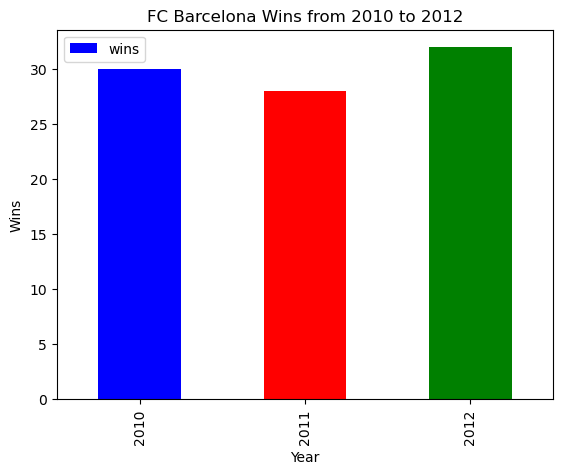

In [12]:
# Example
df[df['team'] == 'FCBarcelona'].plot.bar(x='year', y='wins', 
   color=['b', 'r', 'g'], 
   title='FC Barcelona Wins from 2010 to 2012',
   xlabel='Year',
   ylabel='Wins'
   )

#### Pandas .pivot() method

In [13]:
# Reshapes the pandas dataframe
fcb_vcf_wins_pivoted = fcb_vcf_wins.pivot(index='year', columns='team', values='wins')

### Pandas groupby() method

In [19]:
team_wins = df.groupby(['team', 'wins']).sum()
print(team_wins)

                  year  draws  losses  m_index
team        wins                              
FCBarcelona 28    2011      7       3        2
            30    2010      6       2        1
            32    2012      4       2        3
RMadrid     26    2012      7       5        6
            29    2010      5       4        4
            32    2011      4       2        5
ValenciaCF  17    2011     10      11        8
            19    2012      8      11        9
            21    2010      8       9        7
